In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('C:\\Users\\spart\\Desktop\\Datascience\\NLP\\quora-question-pairs\\train.csv')

In [3]:
df.head(5)

,id,qid1,qid2,question1,question2,is_duplicate
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0


In [4]:
df.shape

(404290, 6)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 404290 entries, 0 to 404289
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            404290 non-null  int64 
 1   qid1          404290 non-null  int64 
 2   qid2          404290 non-null  int64 
 3   question1     404289 non-null  object
 4   question2     404288 non-null  object
 5   is_duplicate  404290 non-null  int64 
dtypes: int64(4), object(2)
memory usage: 18.5+ MB


In [6]:
df.isnull().sum()    

id              0
qid1            0
qid2            0
question1       1
question2       2
is_duplicate    0
dtype: int64

In [7]:
df.duplicated().sum()   

0

In [8]:
print(df['is_duplicate'].value_counts())            
print((df['is_duplicate'].value_counts()/df['is_duplicate'].count())*100)          

is_duplicate
0    255027
1    149263
Name: count, dtype: int64
is_duplicate
0    63.080215
1    36.919785
Name: count, dtype: float64


<Axes: xlabel='is_duplicate'>

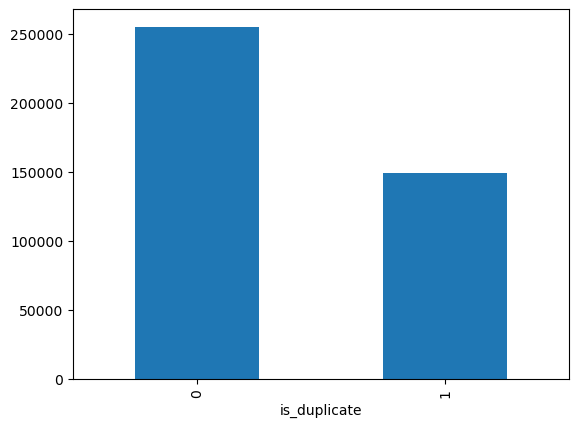

In [9]:
df['is_duplicate'].value_counts().plot(kind='bar')

In [10]:
qid=pd.Series(df['qid1'].tolist()+df['qid2'].tolist())
x=qid.value_counts()>1
print('No of Unique questions',np.unique(qid).shape[0])
print('No of Questions repeated',x[x].shape[0])

No of Unique questions 537933
No of Questions repeated 111780


In [11]:
x[x].size

111780

In [12]:
dfn=df.sample(30000)

In [13]:
dfn.isnull().sum()

id              0
qid1            0
qid2            0
question1       0
question2       0
is_duplicate    0
dtype: int64

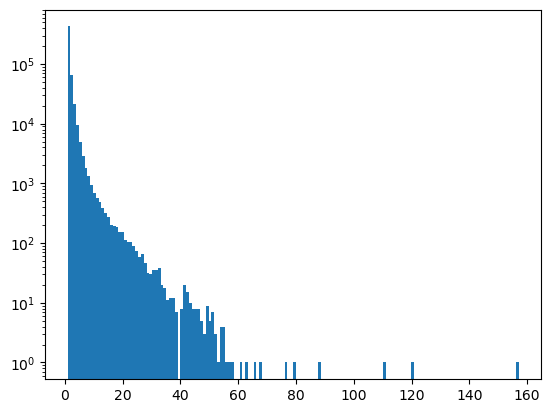

In [14]:
plt.hist(qid.value_counts().values,bins=160)
plt.yscale('log')
plt.show()

In [15]:
que_df=dfn[['question1','question2']]
que_df

,question1,question2
216838,How can you learn fast?,What is the fastest way to learn something?
271671,What are some good sites to download Marathi e...,Where can I download free e-books of Hindi nov...
36511,What are some mind-blowing technologies tools ...,What are some mind-blowing tech tools that mos...
133403,Is scat sex disgusting?,Is it wrong to be disgusted by fat people?
291888,How did you achieve your work/life balance?,How do I find work-life balance?
...,...,...
214988,Which questions are to be asked on Stack Overf...,How do I ask a question on Stack Overflow?
342988,Are there any other books similar to The Manch...,Are there any books that are similar to the ma...
101061,Can someone translate those pictures from Arab...,Can someone translate this photo from Arabic t...
304199,How do I track a person basing on his mobile p...,How do I track someone from his mobile number?


In [16]:
from sklearn.feature_extraction.text import CountVectorizer
questions=list(que_df['question1'])+list(que_df['question2'])
cv=CountVectorizer(max_features=3000)
q1_arr,q2_arr=np.vsplit(cv.fit_transform(questions).toarray(),2)

In [17]:
temp_df1=pd.DataFrame(q1_arr,index=que_df.index)
temp_df2=pd.DataFrame(q2_arr,index=que_df.index)
temp_df=pd.concat([temp_df1,temp_df2],axis=1)
temp_df.shape

(30000, 6000)

In [18]:
temp_df

,0,1,2,3,4,5,6,7,8,9,...,2990,2991,2992,2993,2994,2995,2996,2997,2998,2999
216838,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
271671,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
36511,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
133403,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
291888,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
214988,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
342988,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
101061,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
304199,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [19]:
temp_df['is_duplicate']=dfn['is_duplicate']

In [20]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(temp_df.iloc[:,0:-1].values,temp_df.iloc[:,-1].values,test_size=0.2,random_state=1)

In [21]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
rf=RandomForestClassifier()
rf.fit(X_train,Y_train)
Y_pred=rf.predict(X_test)
accuracy_score(Y_test,Y_pred)

0.739

In [22]:
from xgboost import XGBClassifier
xgb=XGBClassifier()
xgb.fit(X_train,Y_train)
Y_PRED=xgb.predict(X_test)
accuracy_score(Y_test,Y_pred)

0.739

In [23]:
qid=pd.Series(dfn['qid1'].tolist()+dfn['qid2'].tolist())
print('Number of unique questions',np.unique(qid).shape[0])
x=qid.value_counts()>1
print('Number of repeat questions',x[x].shape[0])

Number of unique questions 55383
Number of repeat questions 3422


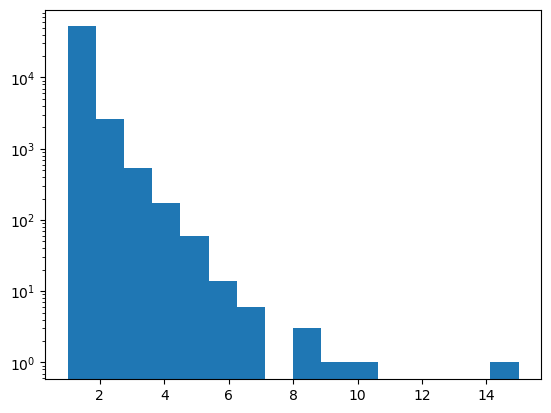

In [26]:
plt.hist(qid.value_counts(),bins=16)
plt.yscale('log')
plt.show()

In [27]:
#Feature Engineering
dfn['q1_len']=dfn['question1'].str.len()
dfn['q2_len']=dfn['question2'].str.len()

In [28]:
dfn.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len
216838,216838,43764,17622,How can you learn fast?,What is the fastest way to learn something?,1,23,43
271671,271671,210130,389807,What are some good sites to download Marathi e...,Where can I download free e-books of Hindi nov...,0,58,50
36511,36511,51352,66562,What are some mind-blowing technologies tools ...,What are some mind-blowing tech tools that mos...,1,91,72
133403,133403,213421,195271,Is scat sex disgusting?,Is it wrong to be disgusted by fat people?,0,23,42
291888,291888,413395,314952,How did you achieve your work/life balance?,How do I find work-life balance?,1,43,32


In [29]:
dfn['q1_num_words']=dfn['question1'].apply(lambda row: len(row.split(" ")))
dfn['q2_num_words']=dfn['question2'].apply(lambda row: len(row.split(" ")))
dfn.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words
216838,216838,43764,17622,How can you learn fast?,What is the fastest way to learn something?,1,23,43,5,8
271671,271671,210130,389807,What are some good sites to download Marathi e...,Where can I download free e-books of Hindi nov...,0,58,50,10,9
36511,36511,51352,66562,What are some mind-blowing technologies tools ...,What are some mind-blowing tech tools that mos...,1,91,72,14,12
133403,133403,213421,195271,Is scat sex disgusting?,Is it wrong to be disgusted by fat people?,0,23,42,4,9
291888,291888,413395,314952,How did you achieve your work/life balance?,How do I find work-life balance?,1,43,32,7,6


In [30]:
def common_words(row):
    w1=set(map(lambda word: word.lower().strip(),row['question1'].split(" ")))
    w2=set(map(lambda word: word.lower().strip(),row['question2'].split(" ")))
    return len(w1 & w2)

In [31]:
dfn['common_words']=dfn.apply(common_words,axis=1)

In [32]:
dfn.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,common_words
216838,216838,43764,17622,How can you learn fast?,What is the fastest way to learn something?,1,23,43,5,8,1
271671,271671,210130,389807,What are some good sites to download Marathi e...,Where can I download free e-books of Hindi nov...,0,58,50,10,9,2
36511,36511,51352,66562,What are some mind-blowing technologies tools ...,What are some mind-blowing tech tools that mos...,1,91,72,14,12,11
133403,133403,213421,195271,Is scat sex disgusting?,Is it wrong to be disgusted by fat people?,0,23,42,4,9,1
291888,291888,413395,314952,How did you achieve your work/life balance?,How do I find work-life balance?,1,43,32,7,6,2


In [33]:
def total_words(row):
    w1=set(map(lambda word: word.lower().strip(),row['question1'].split(" ")))
    w2=set(map(lambda word: word.lower().strip(),row['question2'].split(" ")))
    return (len(w1)+len(w2))

In [34]:
dfn['word_total']=dfn.apply(total_words,axis=1)
dfn.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,common_words,word_total
216838,216838,43764,17622,How can you learn fast?,What is the fastest way to learn something?,1,23,43,5,8,1,13
271671,271671,210130,389807,What are some good sites to download Marathi e...,Where can I download free e-books of Hindi nov...,0,58,50,10,9,2,19
36511,36511,51352,66562,What are some mind-blowing technologies tools ...,What are some mind-blowing tech tools that mos...,1,91,72,14,12,11,25
133403,133403,213421,195271,Is scat sex disgusting?,Is it wrong to be disgusted by fat people?,0,23,42,4,9,1,13
291888,291888,413395,314952,How did you achieve your work/life balance?,How do I find work-life balance?,1,43,32,7,6,2,13


In [43]:
dfn['word_share']=dfn['common_words']/dfn['word_total']

In [44]:
final_df=dfn.drop(columns=['id','qid1','qid2','question1','question2'])

In [45]:
final_df

,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,common_words,word_total,word_share
216838,1,23,43,5,8,1,13,0.076923
271671,0,58,50,10,9,2,19,0.105263
36511,1,91,72,14,12,11,25,0.440000
133403,0,23,42,4,9,1,13,0.076923
291888,1,43,32,7,6,2,13,0.153846
...,...,...,...,...,...,...,...,...
214988,0,50,42,9,9,3,18,0.166667
342988,1,62,65,10,11,9,20,0.450000
101061,0,60,63,9,11,6,20,0.300000
304199,1,51,46,11,9,6,20,0.300000


In [40]:
from sklearn.feature_extraction.text import CountVectorizer
questions=list(que_df['question1'])+list(que_df['question2'])
cv=CountVectorizer(max_features=3000)
q1_arr,q2_arr=np.vsplit(cv.fit_transform(questions).toarray(),2)

In [41]:
temp_df1=pd.DataFrame(q1_arr,index=que_df.index)
temp_df2=pd.DataFrame(q2_arr,index=que_df.index)
temp_df=pd.concat([temp_df1,temp_df2],axis=1)
temp_df.shape

(30000, 6000)

In [46]:
final_df=pd.concat([final_df,temp_df],axis=1)
final_df.head()

,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,common_words,word_total,word_share,0,1,...,2990,2991,2992,2993,2994,2995,2996,2997,2998,2999
216838,1,23,43,5,8,1,13,0.076923,0,0,...,0,0,0,0,0,0,0,0,0,0
271671,0,58,50,10,9,2,19,0.105263,0,0,...,0,0,0,0,0,0,0,0,0,0
36511,1,91,72,14,12,11,25,0.440000,0,0,...,0,0,0,0,0,0,0,0,0,0
133403,0,23,42,4,9,1,13,0.076923,0,0,...,0,0,0,0,0,0,0,0,0,0
291888,1,43,32,7,6,2,13,0.153846,0,0,...,0,0,0,0,0,0,0,0,0,0


In [49]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(final_df.iloc[:,0:-1].values,final_df.iloc[:,-1].values,test_size=0.2,random_state=1)

In [50]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
rf=RandomForestClassifier()
rf.fit(X_train,Y_train)
Y_pred=rf.predict(X_test)
accuracy_score(Y_test,Y_pred)

0.9998333333333334

In [51]:
from xgboost import XGBClassifier
xgb=XGBClassifier()
xgb.fit(X_train,Y_train)
Y_PRED=xgb.predict(X_test)
accuracy_score(Y_test,Y_pred)

0.9998333333333334